# KNN

In [8]:
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import load_and_prepare_data, evaluate_metrics, plot_roc_curve, optimize_threshold

In [3]:
df = pd.read_parquet("../diabetes_dataset_prepared.parquet")
X_train, X_test, y_train, y_test = load_and_prepare_data(df)

We could try to optimize for recall, so as to minimize the chance of our patients thinking they are healthy, when in reality they are not. However, the main purpose is to inform the patients on the mere probability of them having diabetes, along with the explanation of the main factors contributing to that. Therefore, we will optimize for f1 score, while keeping an eye on recall as the second most important metric.

In [4]:
parameters = {"n_neighbors": range(1, 51)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_neighbors': 50}

In [5]:
knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

Training Set Metrics:


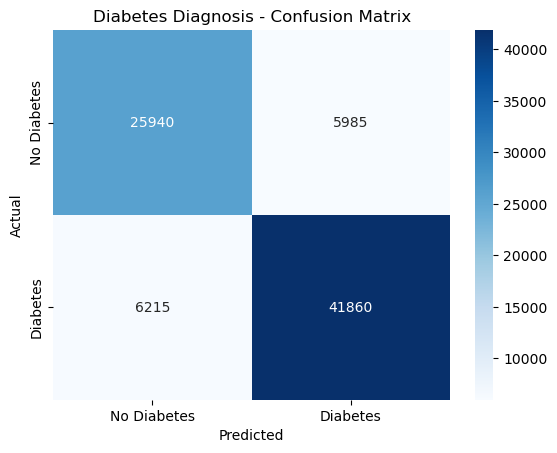

Accuracy: 0.8475
Precision: 0.8749085588880761
Recall: 0.8707228289131566
F1 Score: 0.8728106755629691


Test Set Metrics:


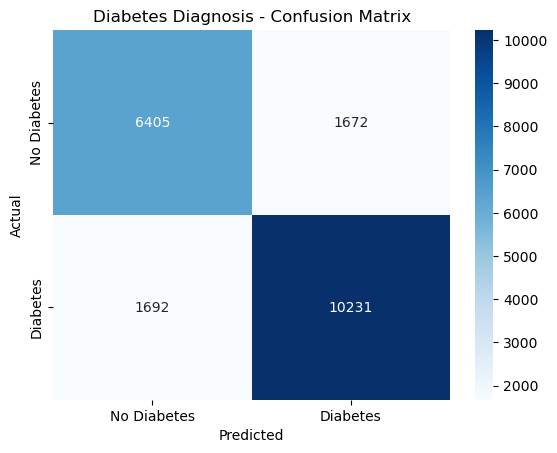

Accuracy: 0.8318
Precision: 0.8595312106191716
Recall: 0.8580894070284324
F1 Score: 0.8588097036850499


In [6]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Our model is not overfitting, but the grid search gave a value equal to the possible maximum. We will broaden our search. Let us search the Ks from 50 to 100.

In [7]:
parameters = {"n_neighbors": range(50, 101)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 51 candidates, totalling 255 fits


{'n_neighbors': 98}

In [8]:
knn2 = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn2.fit(X_train, y_train)

y_train_pred = knn2.predict(X_train)
y_test_pred = knn2.predict(X_test)

Training Set Metrics:


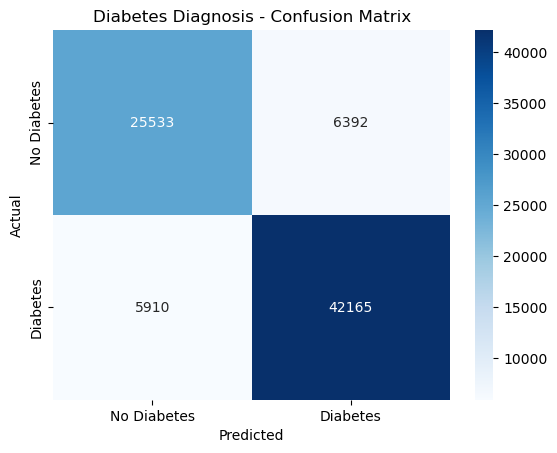

Accuracy: 0.846225
Precision: 0.8683608954424696
Recall: 0.8770670826833074
F1 Score: 0.8726922758506499


Test Set Metrics:


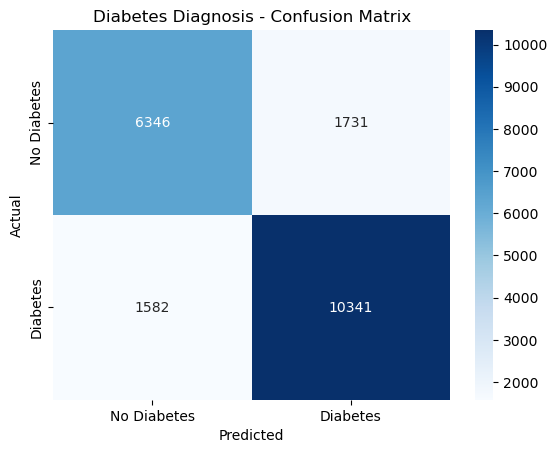

Accuracy: 0.83435
Precision: 0.856610337972167
Recall: 0.8673152730017613
F1 Score: 0.8619295686601375


In [9]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

The test set metrics have marginally improved. The new K is once again close to the maximum possible value, and the model does not seem to be overfitting. Although this improvement was marginal, it worth checking if a higher K would bring better results. Let us broaden our search to the 98-300 range.

In [10]:
parameters = {"n_neighbors": range(98, 301)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 203 candidates, totalling 1015 fits


{'n_neighbors': 286}

In [11]:
knn3 = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn3.fit(X_train, y_train)

y_train_pred = knn3.predict(X_train)
y_test_pred = knn3.predict(X_test)

Training Set Metrics:


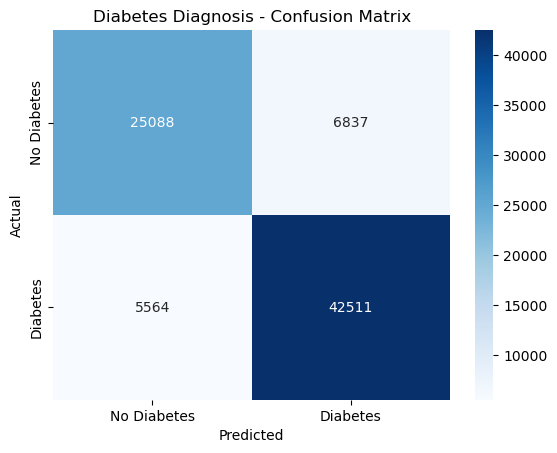

Accuracy: 0.8449875
Precision: 0.8614533517062495
Recall: 0.8842641705668227
F1 Score: 0.8727097297352782


Test Set Metrics:


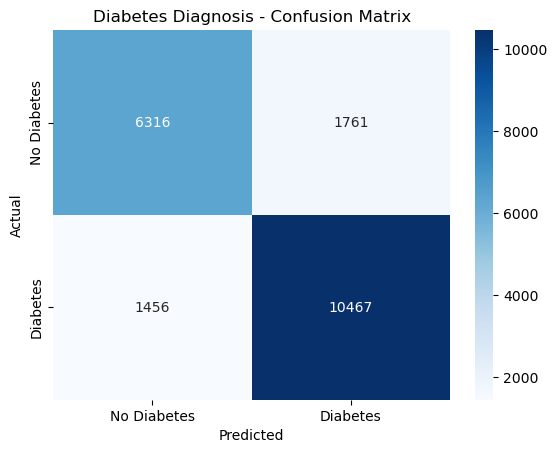

Accuracy: 0.83915
Precision: 0.8559862610402356
Recall: 0.8778830831166653
F1 Score: 0.8667964059459236


In [12]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Our metrics have improved yet again, and there is no overfitting. 286 is relatively close to 300, so we can attempt another search.

In [13]:
parameters = {"n_neighbors": range(286, 501)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 215 candidates, totalling 1075 fits


{'n_neighbors': 428}

In [14]:
knn4 = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn4.fit(X_train, y_train)

y_train_pred = knn4.predict(X_train)
y_test_pred = knn4.predict(X_test)

Training Set Metrics:


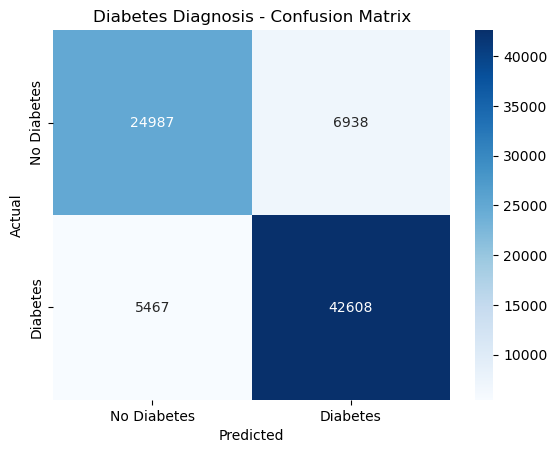

Accuracy: 0.8449375
Precision: 0.8599685141081016
Recall: 0.886281851274051
F1 Score: 0.8729269317052684


Test Set Metrics:


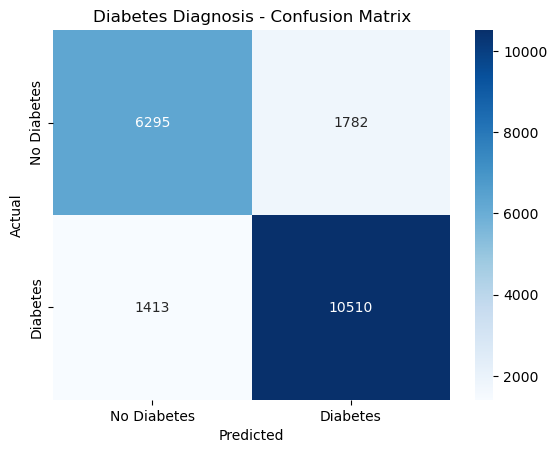

Accuracy: 0.84025
Precision: 0.8550276602668402
Recall: 0.8814895579971483
F1 Score: 0.8680569894693372


In [15]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

Another marginal improvement without overfitting. We are beginning to see diminishing returns, and the searching time is getting longer.

In [16]:
parameters = {"n_neighbors": range(428, 701)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 273 candidates, totalling 1365 fits


{'n_neighbors': 700}

In [17]:
knn5 = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
knn5.fit(X_train, y_train)

y_train_pred = knn5.predict(X_train)
y_test_pred = knn5.predict(X_test)

Training Set Metrics:


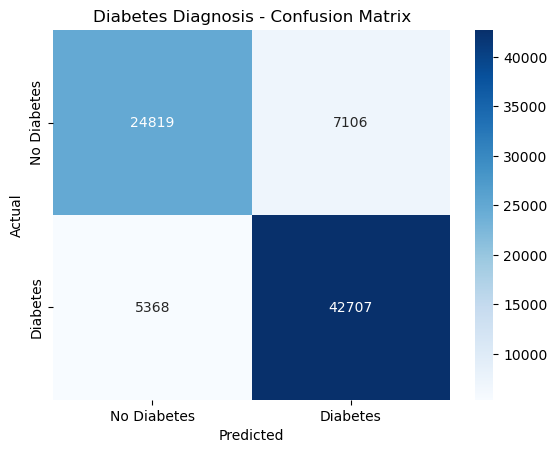

Accuracy: 0.844075
Precision: 0.8573464758195651
Recall: 0.8883411336453458
F1 Score: 0.8725686498855835


Test Set Metrics:


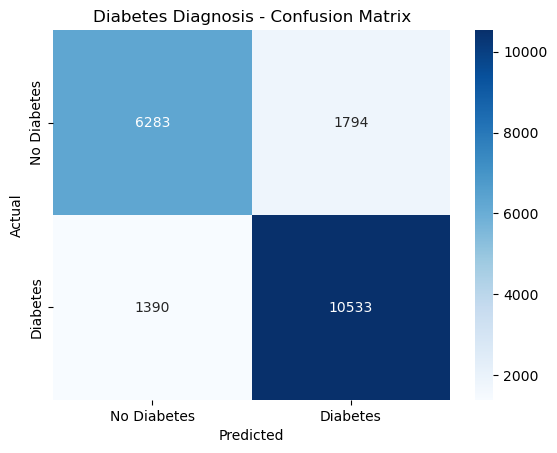

Accuracy: 0.8408
Precision: 0.8544658067656364
Recall: 0.8834186027006626
F1 Score: 0.868701030927835


In [18]:
evaluate_metrics(y_train, y_train_pred, "Training Set Metrics:")

print("\n" + "="*75 + "\n")

evaluate_metrics(y_test, y_test_pred, "Test Set Metrics:")

We can observe that the F1 score increased only by roughly 0.0065. That said, the new value of k is 700, implying that the optimal k may hypothetically be much higher than initially expected. Hence, we will perform the next search with intervals of 1000, in order to speed up the process. We will narrow it down later on, if needed.

In [22]:
parameters = {"n_neighbors": range(700, 10701, 1000)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring="f1", n_jobs=-1, verbose=1)

gridsearch.fit(X_train, y_train)

k = gridsearch.best_params_["n_neighbors"]

gridsearch.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


{'n_neighbors': 700}

It is now clear that the most optimal k is likely not far from 700, and it is not worth searching for it, as it would not improve our metrics in any meaningful way. Now let us try to optimize the threshold for the f1 score.

In [4]:
knn_final = KNeighborsClassifier(n_neighbors=700, n_jobs=-1)
knn_final.fit(X_train, y_train)

y_train_pred = knn_final.predict_proba(X_train)
y_test_pred = knn_final.predict_proba(X_test)

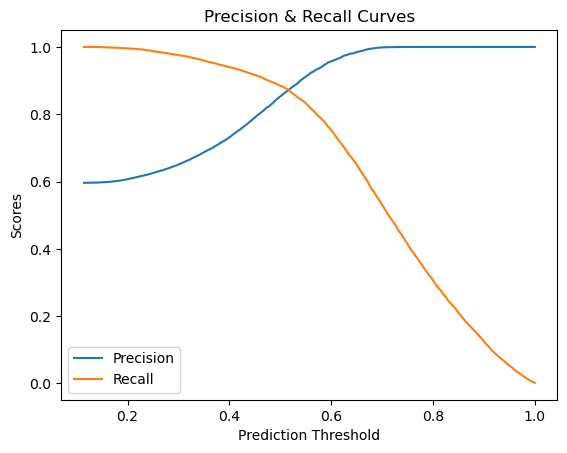

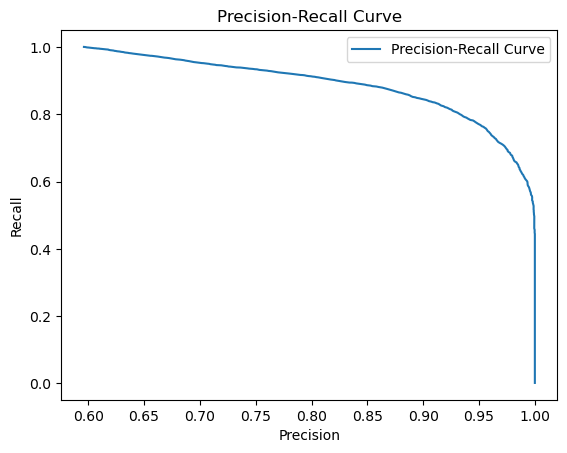

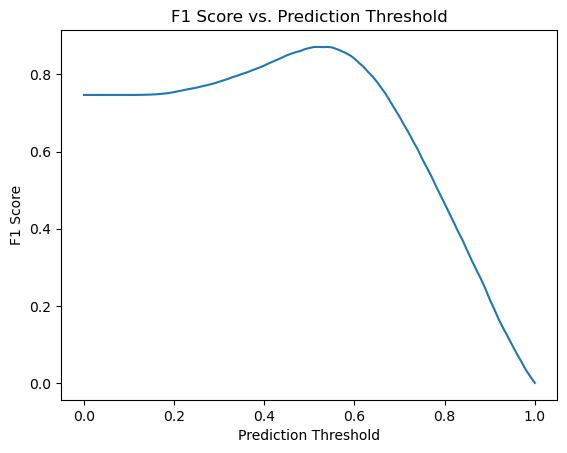

Optimal threshold: 0.54


In [5]:
thresh = optimize_threshold(y_test, y_test_pred[:, 1])
print(f"Optimal threshold: {thresh}")

Test Set Metrics with Optimized Threshold:


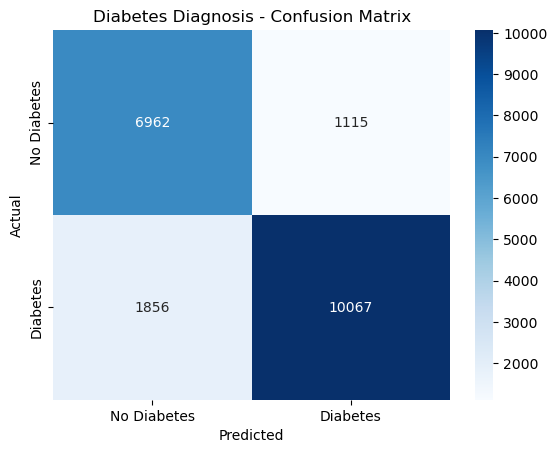

Accuracy: 0.85145
Precision: 0.9002861742085495
Recall: 0.8443344795772876
F1 Score: 0.8714131140445791


In [6]:
preds = y_test_pred[:, 1] >= thresh
evaluate_metrics(y_test, preds, "Test Set Metrics with Optimized Threshold:")

We have managed to achieve f1 score of 0.871. Now let us look at the roc curve.

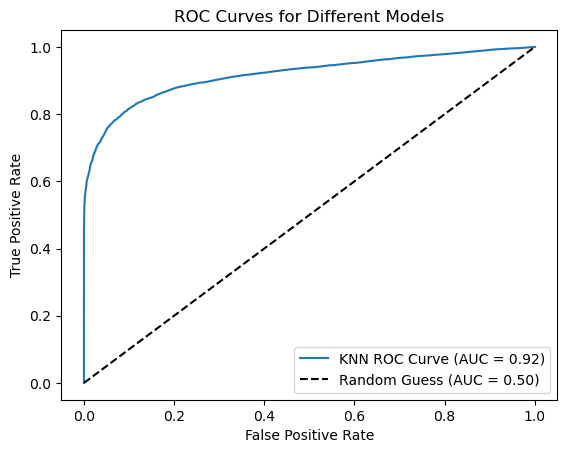

In [7]:
plot_roc_curve(y_test, y_test_pred[:, 1], "KNN ROC Curve")

Our KNN model is significantly better than the Random Guess. We will save it.

In [9]:
joblib.dump(knn_final, "../models/knn_model.joblib")

['../models/knn_model.joblib']